In [ ]:
# question
# The research question: What factors may be related the artists’ exposure? Is there any potential concerns
# for the equality through your analysis?
# Hint: Think about the skewness in the both response variable and explanatory variables, which may related
# to your model choice. There are multiple choices of representation of exposure in the data.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#read in data
import pandas as pd
pd.options.mode.chained_assignment = None
df=pd.read_csv('/content/artists (1).csv')
df

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,Winslow Homer,4.0,1991,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.377853,407,1,0,White
3158,Winslow Homer,5.0,1995,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.335776,407,1,0,White
3159,Winslow Homer,6.0,2001,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.324369,407,1,0,White
3160,Winslow Homer,7.0,2007,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.323356,407,1,0,White


In [3]:
#clean data
mylist=[]
for i in df.columns:
  mylist.append(df[i].isnull().values.any())
null_df = pd.DataFrame(df.columns)
null_df.columns = ["Feature"]
null_df["Coefficient Estimate"] = pd.Series(mylist)
print(df.shape)
df2=df.dropna(how='any')
print(df2.shape)

(3162, 14)
(3100, 14)


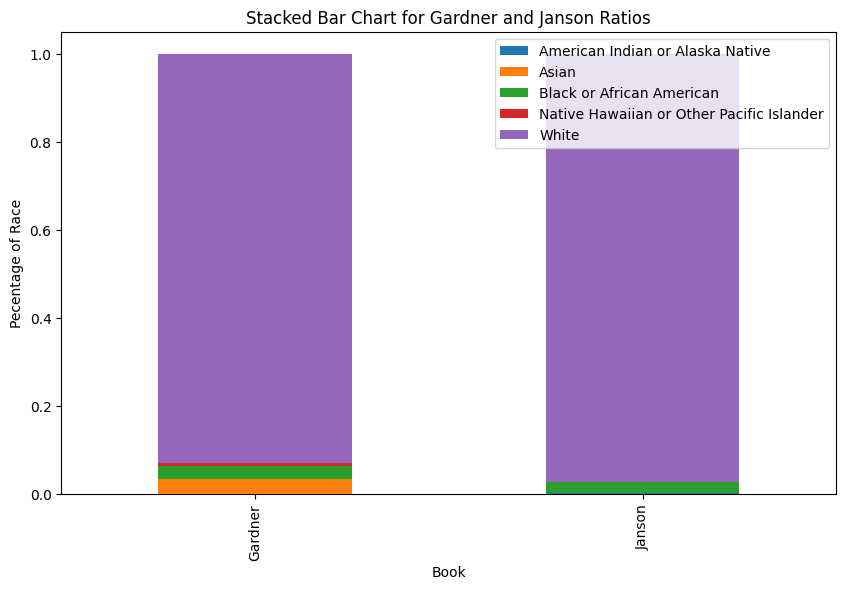

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
#graph 1
dfgardner=df2[df2['book']=='Gardner']
dfjanson=df2[df2['book']=='Janson']
dfg2=dfgardner['artist_race'].value_counts()
lstmy2 = dfg2/dfg2.sum()
lstmy2.sort_index(inplace=True)
dfj2=dfjanson['artist_race'].value_counts()
lstmy = dfj2/dfj2.sum()
lstmy.sort_index(inplace=True)
frame = {'Gardner': lstmy2, 'Janson': lstmy}
result = pd.DataFrame(frame)
result['Janson']=result['Janson'].fillna(0)
#plotting
df_transposed = result.transpose()
df_transposed.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Book')
plt.ylabel('Pecentage of Race')
plt.title('Stacked Bar Chart for Gardner and Janson Ratios')
plt.show()

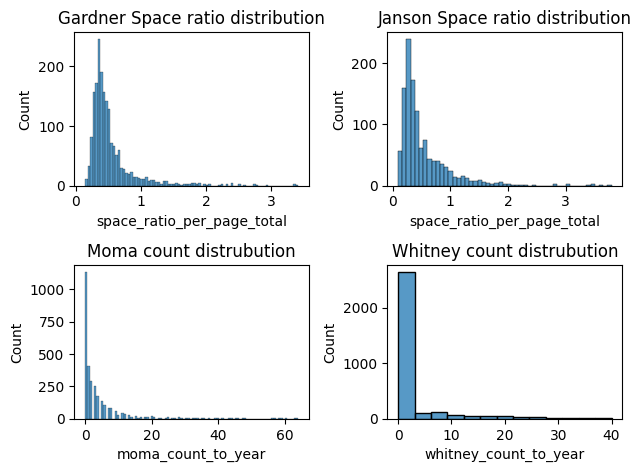

In [11]:
import seaborn as sns
#graph 2
fig, axes = plt.subplots(2, 2)
sns.histplot(data=dfgardner, x="space_ratio_per_page_total", ax=axes[0,0])
sns.histplot(data=dfjanson, x="space_ratio_per_page_total", ax=axes[0,1])
sns.histplot(data=df2, x="moma_count_to_year", ax=axes[1,0])
sns.histplot(data=df2, x="whitney_count_to_year", ax=axes[1,1])
axes[0, 0].title.set_text("Gardner Space ratio distribution")
axes[0, 1].title.set_text("Janson Space ratio distribution")
axes[1, 0].title.set_text("Moma count distrubution")
axes[1, 1].title.set_text("Whitney count distrubution")
fig.tight_layout(pad=1.0)

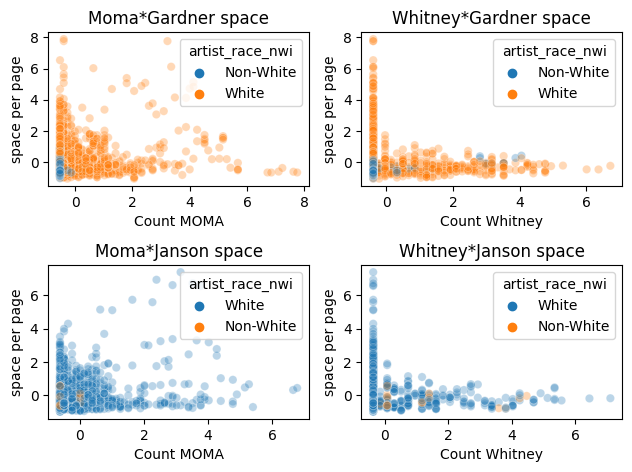

In [15]:
#graph 3
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfgardner[['space_ratio_per_page_total', 'moma_count_to_year', 'whitney_count_to_year']] = StandardScaler().fit_transform(dfgardner[['space_ratio_per_page_total', 'moma_count_to_year', 'whitney_count_to_year']])
dfjanson[['space_ratio_per_page_total', 'moma_count_to_year', 'whitney_count_to_year']] = StandardScaler().fit_transform(dfjanson[['space_ratio_per_page_total', 'moma_count_to_year', 'whitney_count_to_year']])
fig, axes = plt.subplots(2, 2)
sns.scatterplot(data=dfgardner, x="moma_count_to_year", y="space_ratio_per_page_total", hue="artist_race_nwi",alpha=0.3, ax=axes[0,0])
sns.scatterplot(data=dfgardner, x="whitney_count_to_year", y="space_ratio_per_page_total", hue="artist_race_nwi",alpha=0.3, ax=axes[0,1])
sns.scatterplot(data=dfjanson, x="moma_count_to_year", y="space_ratio_per_page_total", hue="artist_race_nwi",alpha=0.3, ax=axes[1,0])
sns.scatterplot(data=dfjanson, x="whitney_count_to_year", y="space_ratio_per_page_total", hue="artist_race_nwi",alpha=0.3, ax=axes[1,1])
axes[0, 0].title.set_text("Moma*Gardner space")
axes[0, 1].title.set_text("Whitney*Gardner space")
axes[1, 0].title.set_text("Moma*Janson space")
axes[1, 1].title.set_text("Whitney*Janson space")
axes[0,0].set_ylabel('space per page')
axes[0,0].set_xlabel('Count MOMA')
axes[1,0].set_ylabel('space per page')
axes[1,0].set_xlabel('Count MOMA')
axes[0,1].set_ylabel('space per page')
axes[0,1].set_xlabel('Count Whitney')
axes[1,1].set_ylabel('space per page')
axes[1,1].set_xlabel('Count Whitney')
fig.tight_layout(pad=1.0)
plt.show()

In [19]:
dfgardner=df2[df2['book']=='Gardner']
dfjanson=df2[df2['book']=='Janson']
dfg2=dfgardner['artist_race'].value_counts()
lstmy2 = dfg2/dfg2.sum()
lstmy2.sort_index(inplace=True)
dfj2=dfjanson['artist_race'].value_counts()
lstmy = dfj2/dfj2.sum()
lstmy.sort_index(inplace=True)

#gardner
garded=dfgardner['year'].unique()
df_result = pd.DataFrame()
for i in garded:
  dfgardner=df2[(df2['book']=='Gardner') & (df2['year']== i)]
  dfg2=dfgardner['artist_race'].value_counts()
  lstmy2 = dfg2/dfg2.sum()
  lstmy2 = lstmy2.append(pd.Series([i], index=['year']))
  lstmy2.sort_index(inplace=True)
  new_column_name = f'Gardner_{i}'
  df_result = pd.concat([df_result, lstmy2.rename(new_column_name)], axis=1, sort=True)
df_result=df_result.fillna(0)

#Janson
janed=dfjanson['year'].unique()
df_result2 = pd.DataFrame()
for i in janed:
  dfjan=df2[(df2['book']=='Janson') & (df2['year']== i)]
  dfj2=dfjan['artist_race'].value_counts()
  lstmy2 = dfj2/dfj2.sum()
  lstmy2 = lstmy2.append(pd.Series([i], index=['year']))
  lstmy2.sort_index(inplace=True)
  new_column_name = f'Janson_{i}'
  df_result2 = pd.concat([df_result2, lstmy2.rename(new_column_name)], axis=1, sort=True)
df_result2=df_result2.fillna(0)

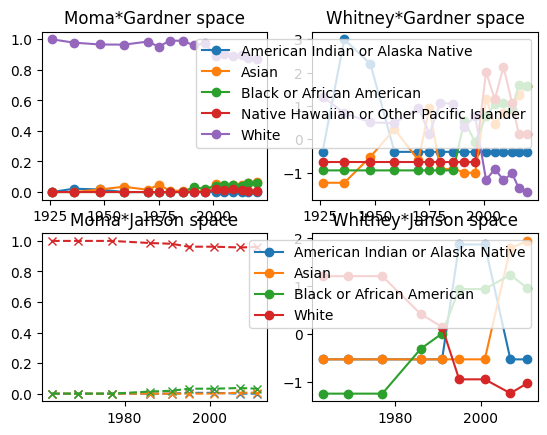

In [20]:
new_df = df_result.transpose()
new_df2 = df_result2.transpose()
new_df.set_index('year', inplace=True)
new_df2.set_index('year', inplace=True)
new_df.sort_index(inplace=True)
new_df2.sort_index(inplace=True)
# Plot the data
fig, axes = plt.subplots(2, 2)
axes[0,0].plot(new_df.index, new_df, label='Label for DataFrame 1', marker='o')
df_standardized = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns, index=new_df.index)
df_standardized.plot(kind='line', marker='o', ax=axes[0,1])
axes[1,0].plot(new_df2.index, new_df2, label='Label for DataFrame 2', marker='x', linestyle='dashed')
df_standardized = pd.DataFrame(scaler.fit_transform(new_df2), columns=new_df2.columns, index=new_df2.index)
df_standardized.plot(kind='line', marker='o', ax=axes[1,1])
# Add labels and title
axes[0, 0].title.set_text("Moma*Gardner space")
axes[0, 1].title.set_text("Whitney*Gardner space")
axes[1, 0].title.set_text("Moma*Janson space")
axes[1, 1].title.set_text("Whitney*Janson space")
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('')
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('')

# Show the plot
plt.show()

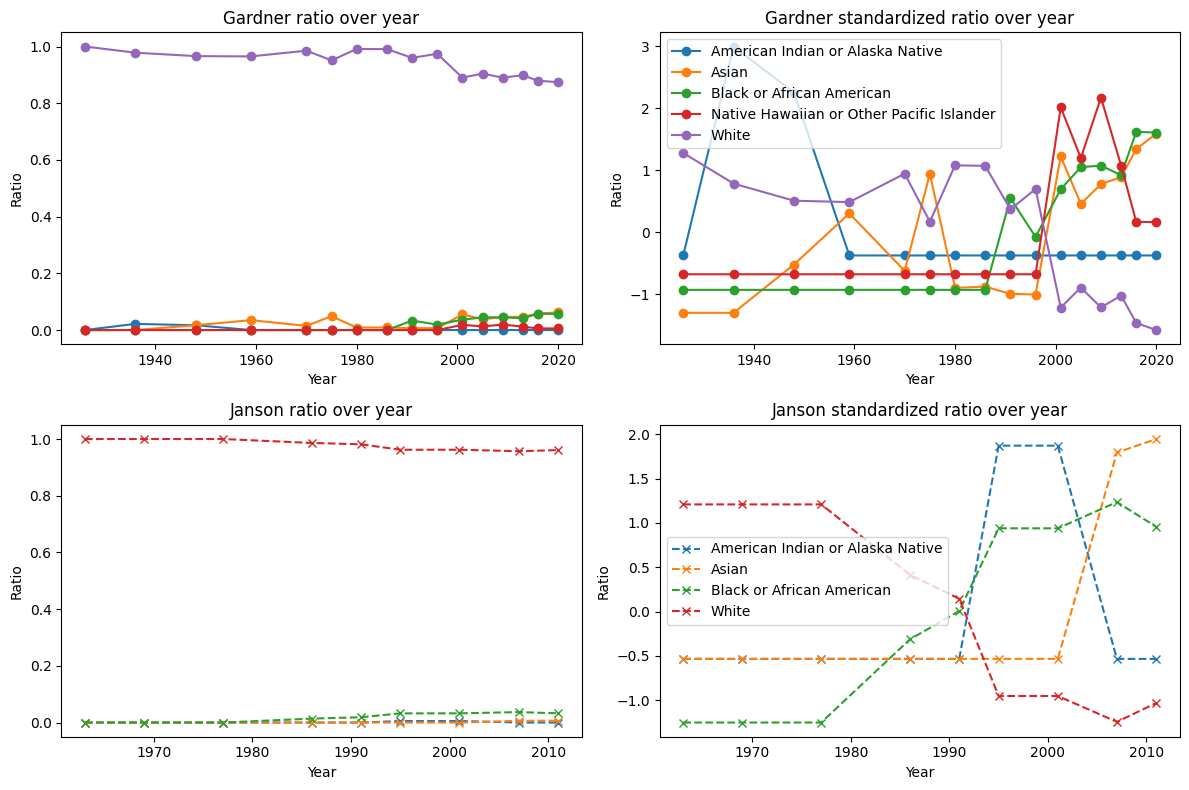

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'scaler' is defined somewhere before this code

# Transpose the dataframes
new_df = df_result.transpose()
new_df2 = df_result2.transpose()

# Set 'year' as the index
new_df.set_index('year', inplace=True)
new_df2.set_index('year', inplace=True)

# Sort the index
new_df.sort_index(inplace=True)
new_df2.sort_index(inplace=True)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot original data
axes[0, 0].plot(new_df.index, new_df, marker='o')
axes[1, 0].plot(new_df2.index, new_df2, marker='x', linestyle='dashed')

# Standardize the data and plot
df_standardized = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns, index=new_df.index)
df_standardized.plot(kind='line', marker='o', ax=axes[0, 1])

df_standardized = pd.DataFrame(scaler.fit_transform(new_df2), columns=new_df2.columns, index=new_df2.index)
df_standardized.plot(kind='line', marker='x', linestyle='dashed', ax=axes[1, 1])

# Add labels and title
axes[0, 0].set_title("Gardner ratio over year")
axes[0, 1].set_title("Gardner standardized ratio over year")
axes[1, 0].set_title("Janson ratio over year")
axes[1, 1].set_title("Janson standardized ratio over year")

# Remove unnecessary labels
for ax in axes.flat:
    ax.set_ylabel('Ratio')
    ax.set_xlabel('Year')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df2

,artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
0,Aaron Douglas,9.0,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.353366,2,0,0,Non-White
1,Aaron Douglas,10.0,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.373947,2,0,0,Non-White
2,Aaron Douglas,11.0,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.303259,2,0,0,Non-White
3,Aaron Douglas,12.0,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.377049,2,0,0,Non-White
4,Aaron Douglas,13.0,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.398410,2,0,0,Non-White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,Winslow Homer,4.0,1991,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.377853,407,1,0,White
3158,Winslow Homer,5.0,1995,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.335776,407,1,0,White
3159,Winslow Homer,6.0,2001,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.324369,407,1,0,White
3160,Winslow Homer,7.0,2007,American,American,Male,White,Not Hispanic or Latino origin,Janson,0.323356,407,1,0,White


In [ ]:
#polynomial regression on whole data
#polynomial regression on just most recent year

In [25]:
from sklearn.preprocessing import OneHotEncoder
df2['year'] = df2['year'].astype('category')
df2['artist_nationality'] = df2['artist_nationality'].astype('category')
df2['artist_gender'] = df2['artist_gender'].astype('category')
df2['artist_race'] = df2['artist_race'].astype('category')
df2['artist_race_nwi'] = df2['artist_race_nwi'].astype('category')
df2['book'] = df2['book'].astype('category')
df2['year'] = df2['year'].cat.codes
df2['artist_nationality'] = df2['artist_nationality'].cat.codes
df2['artist_gender'] = df2['artist_gender'].cat.codes
df2['artist_race'] = df2['artist_race'].cat.codes
df2['artist_race_nwi'] = df2['artist_race_nwi'].cat.codes
df2['book'] = df2['book'].cat.codes
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(df2[['year', 'artist_nationality', 'artist_gender', 'artist_race','artist_race_nwi','book']]).toarray())
column_names = ['year', 'artist_nationality', 'artist_gender', 'artist_race', 'artist_race_nwi', 'book']
new_column_names = [f"{col}_{cat}" for col in column_names for cat in df2[col].unique()]
enc_data.columns = new_column_names
New_df = df2.join(enc_data)
New_df.drop(columns=['artist_name','edition_number','year', 'artist_nationality', 'artist_nationality_other', 'artist_gender', 'artist_race', 'artist_ethnicity','book','artist_unique_id', 'artist_race_nwi'],inplace=True)
New_df=New_df.dropna(how='any')
y=New_df['space_ratio_per_page_total']
New_df[New_df.columns] = scaler.fit_transform(New_df[New_df.columns])
X=New_df.drop(columns=['space_ratio_per_page_total'])
# moma_count_to_year
# whitney_count_to_year
# space_ratio_per_page_total

In [ ]:
X.columns

Index(['moma_count_to_year', 'whitney_count_to_year', 'year_11', 'year_13',
       'year_14', 'year_15', 'year_17', 'year_19', 'year_20', 'year_21',
       'year_6', 'year_7', 'year_9', 'year_10', 'year_1', 'year_2', 'year_3',
       'year_0', 'year_12', 'year_16', 'year_18', 'year_8', 'year_4', 'year_5',
       'artist_nationality_0', 'artist_nationality_20',
       'artist_nationality_22', 'artist_nationality_41',
       'artist_nationality_1', 'artist_nationality_14',
       'artist_nationality_30', 'artist_nationality_21',
       'artist_nationality_44', 'artist_nationality_2', 'artist_nationality_8',
       'artist_nationality_39', 'artist_nationality_17',
       'artist_nationality_7', 'artist_nationality_34',
       'artist_nationality_33', 'artist_nationality_9',
       'artist_nationality_32', 'artist_nationality_35',
       'artist_nationality_4', 'artist_nationality_3', 'artist_nationality_11',
       'artist_nationality_42', 'artist_nationality_28',
       'artist_nationali

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios= [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas,'l1_ratio':l1_ratios}
elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Mean Squared Error on Test Set: 0.15609427494207834


                  Feature  Coefficient Estimate
0      moma_count_to_year              0.041811
1   whitney_count_to_year             -0.026921
2                 year_11              0.000000
3                 year_13             -0.000000
4                 year_14             -0.000000
..                    ...                   ...
79          artist_race_0             -0.000000
80      artist_race_nwi_0              0.000000
81      artist_race_nwi_1             -0.000000
82                 book_0              0.000000
83                 book_1             -0.000000

[84 rows x 2 columns]


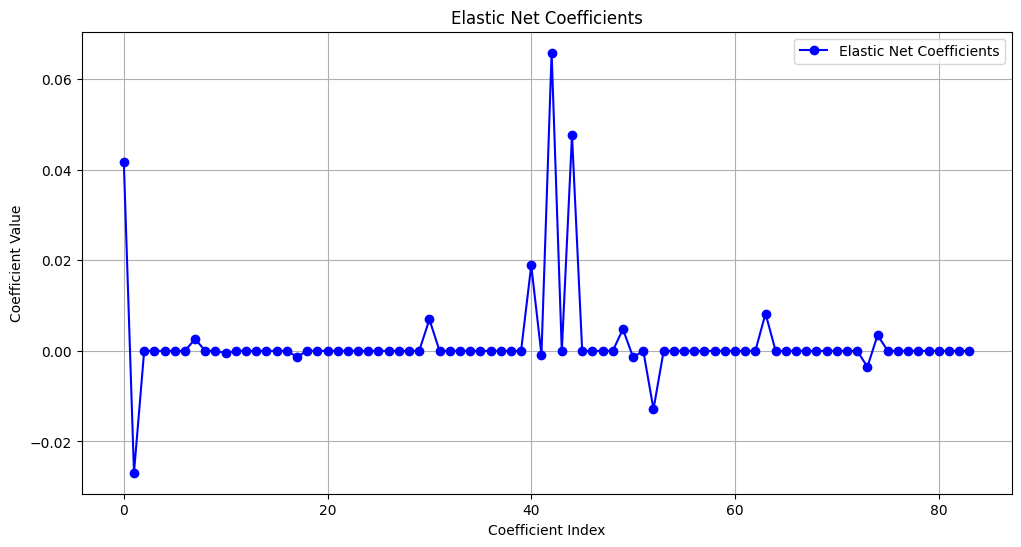

In [28]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(best_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(best_model.coef_, marker='o', linestyle='-', color='b', label='Elastic Net Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Elastic Net Coefficients")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
f=coeff_df[(coeff_df != 0).all(1)]
f

,Feature,Coefficient Estimate
0,moma_count_to_year,0.041811
1,whitney_count_to_year,-0.026921
7,year_19,0.002636
10,year_6,-0.000476
17,year_0,-0.001290
30,artist_nationality_30,0.006961
40,artist_nationality_9,0.018899
41,artist_nationality_32,-0.000803
42,artist_nationality_35,0.065884
43,artist_nationality_4,-0.000054


In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_poly_fit = poly_model.predict(X_poly)

MSE = mean_squared_error(y, y_poly_fit)
print(MSE)

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have features X and target variable y

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}
elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_


Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.1}


In [30]:
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.15797078884208673


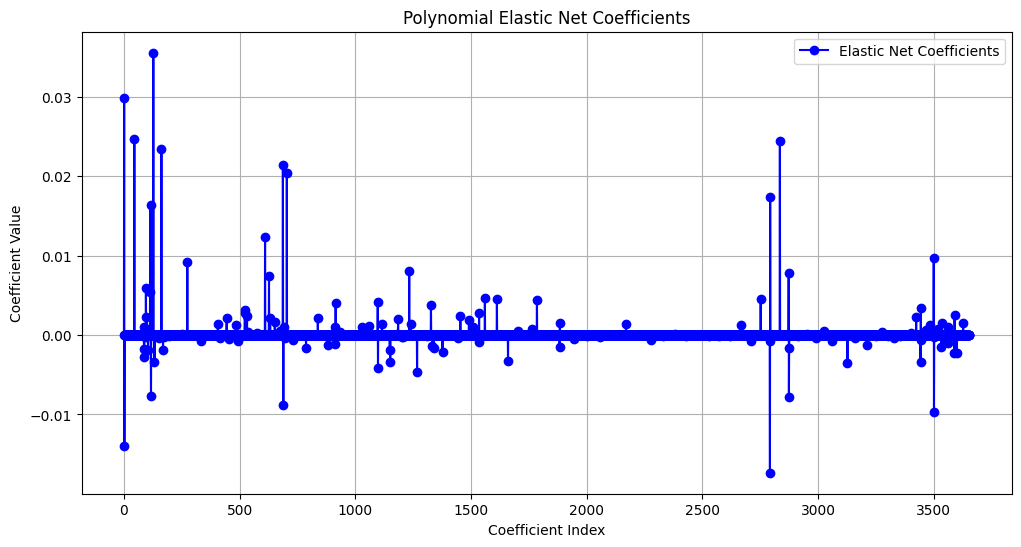

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(best_model.coef_, marker='o', linestyle='-', color='b', label='Elastic Net Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Polynomial Elastic Net Coefficients")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
poly_feature_names = poly_features.get_feature_names_out()
coeff_df = pd.DataFrame(poly_feature_names)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(best_model.coef_)
f=coeff_df[(coeff_df != 0).all(1)]

array(['1', 'moma_count_to_year', 'whitney_count_to_year', ...,
       'book_0^2', 'book_0 book_1', 'book_1^2'], dtype=object)

In [ ]:
f.sort_values(by=['Coefficient Estimate'], inplace=True)
f

,Feature,Coefficient Estimate
2792,artist_nationality_35 book_0,-0.017331
2,whitney_count_to_year,-0.014013
3501,artist_nationality_31 book_1,-0.009675
689,year_19 artist_nationality_3,-0.008749
2874,artist_nationality_3 book_1,-0.007762
...,...,...
162,moma_count_to_year artist_race_1,0.023379
2835,artist_nationality_3^2,0.024390
45,artist_nationality_3,0.024719
1,moma_count_to_year,0.029908


In [ ]:
dfgardner=df2[New_df['book']=='Gardner']
dfjanson=df2[New_df['book']=='Janson']
df2020=df2[New_df['year']=='2020']
df1926=df2[New_df['year']=='1926']

In [ ]:
#dfgardner
y=dfgardner['space_ratio_per_page_total']
dfgardner[dfgardner.columns] = scaler.fit_transform(dfgardner[dfgardner.columns])
X=dfgardner.drop(columns=['space_ratio_per_page_total'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios= [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas,'l1_ratio':l1_ratios}
elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(best_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(best_model.coef_, marker='o', linestyle='-', color='b', label='Elastic Net Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Elastic Net Coefficients Gardner")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#dfjanson
y=dfjanson['space_ratio_per_page_total']
dfjanson[dfjanson.columns] = scaler.fit_transform(dfjanson[dfjanson.columns])
X=dfjanson.drop(columns=['space_ratio_per_page_total'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios= [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas,'l1_ratio':l1_ratios}
elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(best_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(best_model.coef_, marker='o', linestyle='-', color='b', label='Elastic Net Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Elastic Net Coefficients Janson")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#df2020
y=df2020['space_ratio_per_page_total']
df2020[df2020.columns] = scaler.fit_transform(df2020[df2020.columns])
X=df2020.drop(columns=['space_ratio_per_page_total'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios= [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas,'l1_ratio':l1_ratios}
elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(best_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(best_model.coef_, marker='o', linestyle='-', color='b', label='Elastic Net Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Elastic Net Coefficients 2020")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#df1926
y=df1926['space_ratio_per_page_total']
df1926[df1926.columns] = scaler.fit_transform(df1926[df1926.columns])
X=df1926.drop(columns=['space_ratio_per_page_total'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a range of alpha values to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
l1_ratios= [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas,'l1_ratio':l1_ratios}
elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(best_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(best_model.coef_, marker='o', linestyle='-', color='b', label='Elastic Net Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Elastic Net Coefficients 1926")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['year'].unique()

array([1991, 1996, 2001, 2005, 2009, 2013, 2016, 2020, 1970, 1975, 1980,
       1986, 1936, 1948, 1959, 1926, 1995, 2007, 2011, 1977, 1963, 1969])